# 2. Feature Engineering

The model in section 1 does not seem very interesting, attempt to use the following nodes to improve the model:

Nodes:

Links:


In [77]:
import pandas as pd

from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.factors.discrete import TabularCPD, DiscreteFactor
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork


## 1.1 Data Preparation & Cleaning

### 1.1.1 Load Source Date

In [2]:
# load the source data
df_source = pd.read_csv('data/raw/DataCoSupplyChainDataset.csv', encoding='unicode_escape')
df_source.drop_duplicates(inplace=True)

print(df_source.shape)
with pd.option_context('display.max_columns', None):
    display(df_source.head())

(180519, 53)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


## 1.2 Data Visualization & Analysis

<AxesSubplot: >

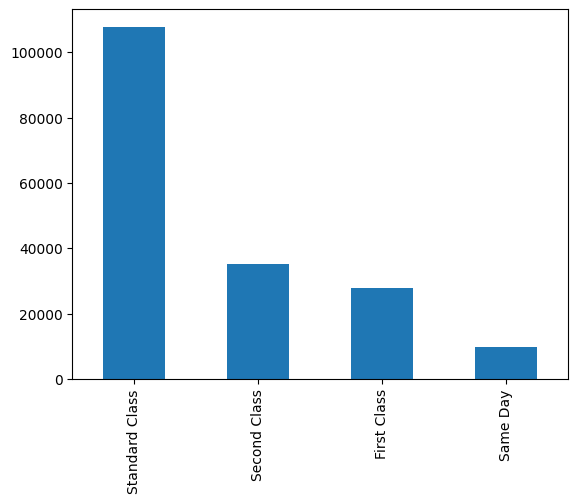

In [3]:
# shipping mode
df_source['Shipping Mode'].value_counts().plot(kind='bar')

<AxesSubplot: >

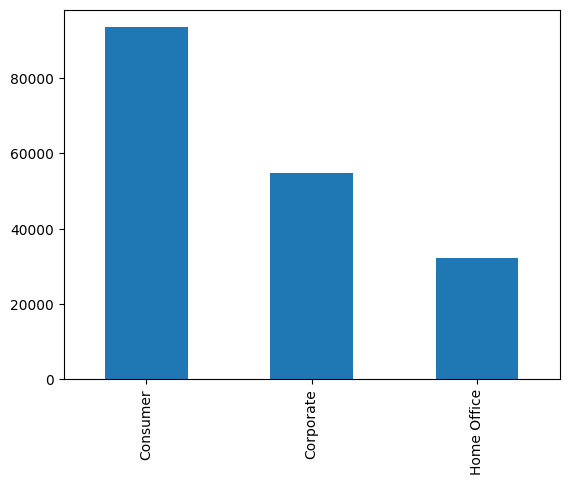

In [4]:
# customer segment
df_source['Customer Segment'].value_counts().plot(kind='bar')

<AxesSubplot: >

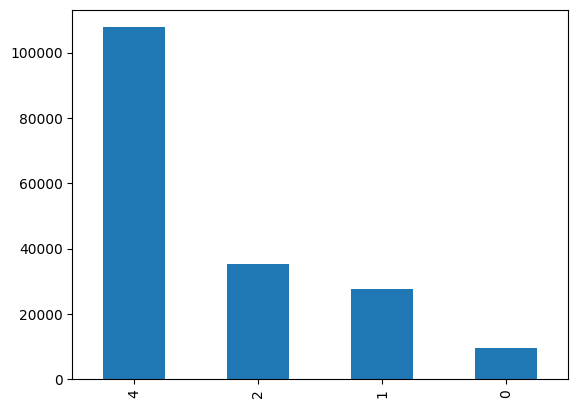

In [5]:
# Days for shipment (scheduled)
df_source['Days for shipment (scheduled)'].value_counts().plot(kind='bar')

<AxesSubplot: >

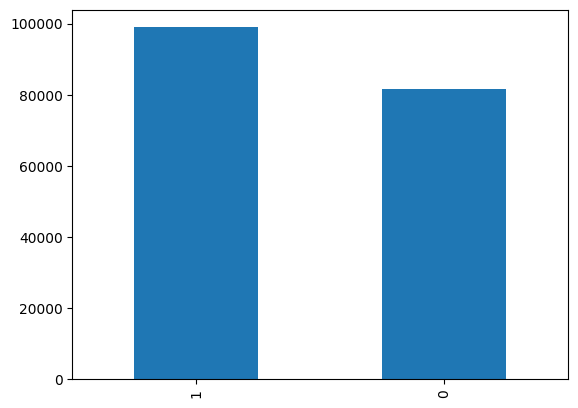

In [6]:
# Late_delivery_risk
df_source['Late_delivery_risk'].value_counts().plot(kind='bar')

In [7]:
# Customer State
customer_state_vc = df_source['Customer State'].value_counts()

print(f'Number of states: {len(customer_state_vc)}')
print(customer_state_vc)

Number of states: 46
PR       69373
CA       29223
NY       11327
TX        9103
IL        7631
FL        5456
OH        4095
PA        3824
MI        3804
NJ        3191
AZ        3026
GA        2503
MD        2415
NC        1992
CO        1914
VA        1849
OR        1668
MA        1607
TN        1582
NV        1440
MO        1354
HI        1248
CT        1094
UT         968
NM         949
LA         948
WA         920
WI         850
MN         672
SC         665
IN         581
DC         579
KY         487
KS         458
DE         269
RI         243
WV         241
OK         232
ND         215
ID         167
AR         164
MT          87
IA          67
AL          35
95758        2
91732        1
Name: Customer State, dtype: int64


<AxesSubplot: >

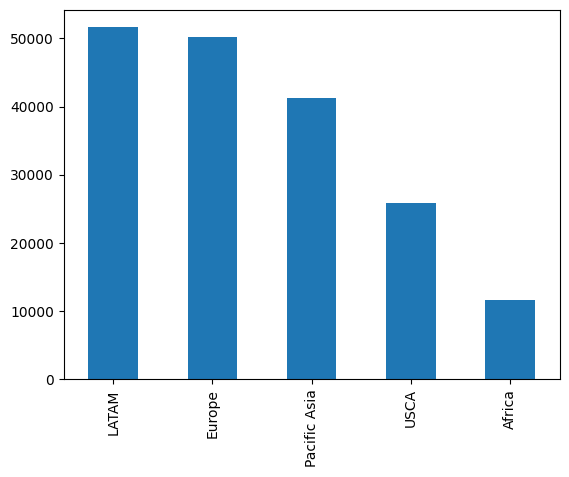

In [8]:
# market
df_source['Market'].value_counts().plot(kind='bar')

> - A question could be which store is most likely to have a late delivery risk?
> - which store does not deliver to the market

In [9]:
# State to which the store where the purchase is registered belongs
df_source[df_source['Market'] == 'Africa']['Customer State'].value_counts()

PR    4198
CA    1812
NY     753
TX     657
IL     500
FL     379
PA     310
OH     275
MI     207
GA     202
AZ     198
NJ     196
CO     152
OR     145
MD     139
VA     136
NC     115
MO     112
MA     106
HI      92
NM      89
TN      87
NV      69
WI      68
LA      67
IN      67
WA      65
SC      55
MN      54
CT      43
DC      43
UT      42
KY      27
WV      27
KS      24
DE      24
AR      17
ND      17
RI      15
AL      10
OK      10
ID       5
IA       3
MT       2
Name: Customer State, dtype: int64

## 1.3 Feature Engineering

Select the columns that will be used as the network nodes and remove duplicate records to have a single record per order.

In [10]:
nodes = [
    'Order Id',
    'Shipping Mode',
    'Customer Segment',
    'Days for shipment (scheduled)',
    'Late_delivery_risk',
    'Customer State',
    'Market',
]

df_data = df_source[nodes] \
    .drop_duplicates() \
    .reset_index(drop=True)


print(df_data.shape)
with pd.option_context('display.max_columns', None):
    display(df_data.head())

(65752, 7)


,Order Id,Shipping Mode,Customer Segment,Days for shipment (scheduled),Late_delivery_risk,Customer State,Market
0,77202,Standard Class,Consumer,4,0,PR,Pacific Asia
1,75939,Standard Class,Consumer,4,1,PR,Pacific Asia
2,75938,Standard Class,Consumer,4,0,CA,Pacific Asia
3,75937,Standard Class,Home Office,4,0,CA,Pacific Asia
4,75936,Standard Class,Corporate,4,0,PR,Pacific Asia


In [11]:
# find columns with missing values
df_data.isnull().sum()

Order Id                         0
Shipping Mode                    0
Customer Segment                 0
Days for shipment (scheduled)    0
Late_delivery_risk               0
Customer State                   0
Market                           0
dtype: int64

## 1.4 Model Training

### 1.4.1 Model Definition

Define the model nodes and edges.

In [12]:
# Create the Bayesian network model
model = BayesianNetwork()

# Add the nodes to the model
model.add_node('Shipping Mode')
model.add_node('Customer Segment')
model.add_node('Days for shipment (scheduled)')
model.add_node('Late_delivery_risk')
model.add_node('Customer State')
model.add_node('Market')

# Add the edges between the nodes to the model
model.add_edge('Shipping Mode', 'Late_delivery_risk')
model.add_edge('Customer Segment', 'Late_delivery_risk')
model.add_edge('Days for shipment (scheduled)', 'Late_delivery_risk')
model.add_edge('Customer State', 'Late_delivery_risk')
model.add_edge('Market', 'Late_delivery_risk')

# model.add_edge('Late_delivery_risk', 'Customer State')
# model.add_edge('Late_delivery_risk', 'Market')

### 1.4.2 Compute the Probability Distribution Table (PDT)

In [13]:
model.fit(
    data=df_data, 
    estimator=MaximumLikelihoodEstimator)

In [14]:
# Check if the model is valid
model.check_model()

True

In [15]:
model_cpds = model.get_cpds()
model_cpds

[<TabularCPD representing P(Shipping Mode:4) at 0x7efdb87de580>,
 <TabularCPD representing P(Customer Segment:3) at 0x7efdb8597610>,
 <TabularCPD representing P(Days for shipment (scheduled):4) at 0x7efdb8602040>,
 <TabularCPD representing P(Late_delivery_risk:2 | Customer Segment:3, Customer State:46, Days for shipment (scheduled):4, Market:5, Shipping Mode:4) at 0x7efdb87decd0>,
 <TabularCPD representing P(Customer State:46) at 0x7efdb859ceb0>,
 <TabularCPD representing P(Market:5) at 0x7efdb87de2b0>]

In [16]:
for cpd in model_cpds:
    print(f'--- {cpd.variable} ---')
    print(cpd.values, end='\n\n')

--- Shipping Mode ---
[0.15328811 0.05431014 0.19433629 0.59806546]

--- Customer Segment ---
[0.51890437 0.30198321 0.17911242]

--- Days for shipment (scheduled) ---
[0.05431014 0.15328811 0.19433629 0.59806546]

--- Late_delivery_risk ---
[[[[[[0.5        0.5        0.5        0.5       ]
     [0.5        0.5        0.5        0.5       ]
     [0.5        0.5        0.5        0.5       ]
     [0.5        0.5        0.5        0.5       ]
     [0.5        0.5        0.5        0.5       ]]

    [[0.5        0.5        0.5        0.5       ]
     [0.5        0.5        0.5        0.5       ]
     [0.5        0.5        0.5        0.5       ]
     [0.5        0.5        0.5        0.5       ]
     [0.5        0.5        0.5        0.5       ]]

    [[0.5        0.5        0.5        0.5       ]
     [0.5        0.5        0.5        0.5       ]
     [0.5        0.5        0.5        0.5       ]
     [0.5        0.5        0.5        0.5       ]
     [0.5        0.5        0.5        0

## 1.5 Model Details

In [17]:
model.active_trail_nodes('Late_delivery_risk')

{'Late_delivery_risk': {'Customer Segment',
  'Customer State',
  'Days for shipment (scheduled)',
  'Late_delivery_risk',
  'Market',
  'Shipping Mode'}}

In [18]:
model.get_independencies()

(Shipping Mode ⟂ Market, Customer Segment, Days for shipment (scheduled), Customer State)
(Shipping Mode ⟂ Customer Segment, Days for shipment (scheduled), Customer State | Market)
(Shipping Mode ⟂ Market, Days for shipment (scheduled), Customer State | Customer Segment)
(Shipping Mode ⟂ Market, Customer Segment, Customer State | Days for shipment (scheduled))
(Shipping Mode ⟂ Market, Customer Segment, Days for shipment (scheduled) | Customer State)
(Shipping Mode ⟂ Days for shipment (scheduled), Customer State | Market, Customer Segment)
(Shipping Mode ⟂ Customer Segment, Customer State | Market, Days for shipment (scheduled))
(Shipping Mode ⟂ Customer Segment, Days for shipment (scheduled) | Market, Customer State)
(Shipping Mode ⟂ Market, Customer State | Customer Segment, Days for shipment (scheduled))
(Shipping Mode ⟂ Market, Days for shipment (scheduled) | Customer Segment, Customer State)
(Shipping Mode ⟂ Market, Customer Segment | Days for shipment (scheduled), Customer State)


## 1.6 Model Queries

In [19]:
infer = VariableElimination(model)

### 1.6.1 What is the probability of a late delivery?

In [20]:
prob_lat_del_risk = infer.query(
    variables=['Late_delivery_risk'],
    joint=False)

print(prob_lat_del_risk['Late_delivery_risk'])

+-----------------------+---------------------------+
| Late_delivery_risk    |   phi(Late_delivery_risk) |
+=======================+===========================+
| Late_delivery_risk(0) |                    0.5218 |
+-----------------------+---------------------------+
| Late_delivery_risk(1) |                    0.4782 |
+-----------------------+---------------------------+


### 1.6.2 What is the state (store state) most likely to be the cause of late delivery?

In [92]:
def get_probabilities(probabilities: DiscreteFactor) -> pd.DataFrame:
    """
    Show probabilities for a given variable.

    Parameters
    ----------
    probabilities : DiscreteFactor
        Probabilities for the variable.

    Returns
    -------
    pd.DataFrame
        Probabilities for the variable.
    """
    # Get the probabilities for each value
    value_probabilities = probabilities.values
    variable_name = list(probabilities.state_names.keys())[0]
    state_names = probabilities.state_names[variable_name]

    # create a dataframe with the probabilities
    return pd.DataFrame(
        data=value_probabilities,
        index=state_names,
        columns=['Probability']) \
        .sort_values(by='Probability', ascending=False)

In [97]:
# Query the probability of a late delivery for each state
state_late_delivery = infer.query(
    variables=['Customer State'],
    evidence={'Late_delivery_risk': 1})

get_probabilities(state_late_delivery).head(5)

,Probability
PR,0.385261
CA,0.161103
NY,0.061970
TX,0.050941
IL,0.042041


### 1.6.2 Which Market is most likely to have a late delivery?

In [94]:
# Which Market is most likely to have a late delivery?
market_late_delivery = infer.query(
    variables=['Market'],
    evidence={'Late_delivery_risk': 1})

get_probabilities(market_late_delivery).head(5)


,Probability
Europe,0.282268
Pacific Asia,0.268544
LATAM,0.260313
USCA,0.130250
Africa,0.058624


#### 1.6.2.1 Which shipping method is most likely to have a late delivery in the Pacific Asia Market?

In [98]:
# Which shipping method is most likely to have a late delivery in the Pacific Asia Market?
shipping_mode_late_delivery = infer.query(
    variables=['Shipping Mode'],
    evidence={
        'Late_delivery_risk': 1,
        'Market': 'Pacific Asia'
    })

get_probabilities(shipping_mode_late_delivery).head(5)

,Probability
Standard Class,0.538419
Second Class,0.223682
First Class,0.181613
Same Day,0.056286


### 1.6.3 Which customer segment is most likely to have a late delivery

In [99]:
customer_segment_late_delivery = infer.query(
    variables=['Customer Segment'],
    evidence={
        'Late_delivery_risk': 1,
    })

get_probabilities(customer_segment_late_delivery).head(5)

,Probability
Consumer,0.519506
Corporate,0.300829
Home Office,0.179665


### 1.6.3.1 Which shipping method is most likely to have a late delivery in the Corporate segment?

In [100]:
customer_segment_late_delivery = infer.query(
    variables=['Shipping Mode'],
    evidence={
        'Late_delivery_risk': 1,
        'Customer Segment': 'Corporate'
    })

get_probabilities(customer_segment_late_delivery).head(5)

,Probability
Standard Class,0.534602
Second Class,0.225549
First Class,0.183059
Same Day,0.056790
